In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import glob
from PIL import Image

2024-07-28 18:09:42.479424: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 18:09:42.479527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 18:09:42.610222: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(822, 718, 3)

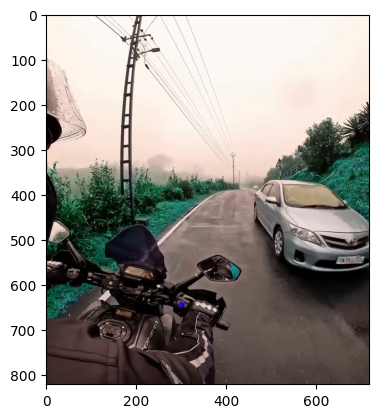

In [28]:
img=cv2.imread('/kaggle/input/yolo-dataset/images/Train/Rainny/Day/rainy day (100).jpg')
plt.imshow(img)
plt.show
img.shape

In [3]:
#Get number of files of .jpg format within a folder
import os
from glob import glob

train_Rainny_Day = glob('/kaggle/input/yolo-dataset/images/Train/Rainny/Day/*.jpg')
train_Rainny_Night = glob('/kaggle/input/yolo-dataset/images/Train/Rainny/Night/*.jpg')
train_Sunny_Day = glob('/kaggle/input/yolo-dataset/images/Train/Sunny/Day/*.jpg')
train_Sunny_Night = glob('/kaggle/input/yolo-dataset/images/Train/Sunny/Night/*.jpg')

val_Rainny_Day = glob('/kaggle/input/yolo-dataset/images/Val/Rainny/Day/*.jpg')
val_Rainny_Night = glob('/kaggle/input/yolo-dataset/images/Val/Rainny/Night/*.jpg')
val_Sunny_Day = glob('/kaggle/input/yolo-dataset/images/Val/Sunny/Day/*.jpg')
val_Sunny_Night = glob('/kaggle/input/yolo-dataset/images/Val/Sunny/Night/*.jpg')

In [4]:
file_paths = (train_Rainny_Day + train_Rainny_Night + train_Sunny_Day + train_Sunny_Night)

# Create lists of labels
weather = ['Rainny'] * (len(train_Rainny_Day) + len(train_Rainny_Night)) + \
          ['Sunny'] * (len(train_Sunny_Day) + len(train_Sunny_Night))

time_of_day = ['Day'] * (len(train_Rainny_Day) + len(train_Sunny_Day)) + \
              ['Night'] * (len(train_Rainny_Night) + len(train_Sunny_Night))

data = {'filename': file_paths, 'weather': weather, 'period': time_of_day}

# Convert dictionary to DataFrame
train_df = pd.DataFrame(data)
train_df

,filename,weather,period
0,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
1,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
2,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
3,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
4,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
...,...,...,...
2500,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2501,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2502,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2503,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night


In [5]:
file_paths = (val_Rainny_Day + val_Rainny_Night + val_Sunny_Day + val_Sunny_Night)

# Create lists of labels
weather = ['Rainny'] * (len(val_Rainny_Day) + len(val_Rainny_Night)) + \
          ['Sunny'] * (len(val_Sunny_Day) + len(val_Sunny_Night))

time_of_day = ['Day'] * (len(val_Rainny_Day) + len(val_Sunny_Day)) + \
              ['Night'] * (len(val_Rainny_Night) + len(val_Sunny_Night))

data = {'filename': file_paths, 'weather': weather, 'period': time_of_day}

# Convert dictionary to DataFrame
val_df = pd.DataFrame(data)
val_df

,filename,weather,period
0,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
1,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
2,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
3,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
4,/kaggle/input/yolo-dataset/images/Val/Rainny/D...,Rainny,Day
...,...,...,...
195,/kaggle/input/yolo-dataset/images/Val/Sunny/Ni...,Sunny,Night
196,/kaggle/input/yolo-dataset/images/Val/Sunny/Ni...,Sunny,Night
197,/kaggle/input/yolo-dataset/images/Val/Sunny/Ni...,Sunny,Night
198,/kaggle/input/yolo-dataset/images/Val/Sunny/Ni...,Sunny,Night


In [6]:
df = train_df

In [7]:
df

,filename,weather,period
0,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
1,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
2,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
3,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
4,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny,Day
...,...,...,...
2500,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2501,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2502,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night
2503,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny,Night


In [8]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [35]:
print(df['period'].value_counts())
print(df['weather'].value_counts())

period
Night    1300
Day      1205
Name: count, dtype: int64
weather
Rainny    1300
Sunny     1205
Name: count, dtype: int64


In [36]:
train_weather=df.drop('period', axis=1)
train_period=df.drop('weather',axis=1)


In [37]:
train_weather

,filename,weather
0,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
1,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
2,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
3,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
4,/kaggle/input/yolo-dataset/images/Train/Rainny...,Rainny
...,...,...
2500,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny
2501,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny
2502,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny
2503,/kaggle/input/yolo-dataset/images/Train/Sunny/...,Sunny


In [38]:
import matplotlib.image as mpimg
import os
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpimg.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [39]:
import keras_cv
datagen= tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=True,
    rotation_range=2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    channel_shift_range=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    # PARAMS TO EXPLORE
    validation_split=0.2,
    zoom_range=0.1,
    preprocessing_function= None
)

In [40]:
mytrain=datagen.flow_from_dataframe(
    train_weather,
    x_col='filename',
    y_col='weather',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="training"
)
myvalid=datagen.flow_from_dataframe(
    train_weather,
    x_col='filename',
    y_col='weather',
    target_size=(224,224),
    color_mode='rgb',
     class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="validation"
)

Found 2004 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.


In [41]:
mytrain2=datagen.flow_from_dataframe(
    train_period,
    x_col='filename',
    y_col='period',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="training"
)
myvalid2=datagen.flow_from_dataframe(
    train_period,
    x_col='filename',
    y_col='period',
    target_size=(224,224),
    color_mode='rgb',
     class_mode='categorical',
    batch_size=32,
    shuffle=True, 
    subset="validation"
)

Found 2004 validated image filenames belonging to 2 classes.
Found 501 validated image filenames belonging to 2 classes.


In [42]:
base_model=tf.keras.applications.resnet.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,  
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [43]:
base_model2=tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,
)


In [44]:
base_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [45]:
base_model2.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [46]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [47]:
print(df['period'].value_counts())
print(df['weather'].value_counts())

period
Night    1300
Day      1205
Name: count, dtype: int64
weather
Rainny    1300
Sunny     1205
Name: count, dtype: int64


In [48]:
base_model.trainable = False#freezing
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = Dense(2,activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [49]:
base_model2.trainable = False#freezing
inputs2 = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x2 = base_model2(inputs2, training=False)
x2 = keras.layers.GlobalAveragePooling2D()(x2)
# A Dense classifier with a single unit (binary classification)
outputs2 = Dense(2,activation='softmax')(x2)
model2 = keras.Model(inputs2, outputs2)

In [50]:
model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [51]:
model2.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [52]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]

In [53]:
m1 = model.fit(
    mytrain,
    validation_data=myvalid,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5938 - loss: 0.9371  

I0000 00:00:1722171444.223285    1372 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 933ms/step - accuracy: 0.8052 - loss: 0.4748 - val_accuracy: 0.9621 - val_loss: 0.1954
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 699ms/step - accuracy: 0.9967 - loss: 0.0467 - val_accuracy: 0.9701 - val_loss: 0.1548
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 701ms/step - accuracy: 0.9998 - loss: 0.0233 - val_accuracy: 0.9900 - val_loss: 0.0742
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 693ms/step - accuracy: 0.9991 - loss: 0.0177 - val_accuracy: 0.9900 - val_loss: 0.0658
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 698ms/step - accuracy: 0.9988 - loss: 0.0133 - val_accuracy: 0.9920 - val_loss: 0.0509
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 698ms/step - accuracy: 0.9984 - loss: 0.0113 - val_accuracy: 0.9920 - val_loss: 0.0398
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 703ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9920 - val_loss: 0.0269
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 697ms/step - accuracy: 0.9994 - loss: 0.0054 - val_accuracy: 0.998

In [54]:
m2 = model2.fit(
    mytrain2,
    validation_data=myvalid2,
    epochs=10,
    verbose=1
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 818ms/step - accuracy: 0.7391 - loss: 0.5736 - val_accuracy: 0.8782 - val_loss: 0.3149
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 700ms/step - accuracy: 0.9383 - loss: 0.1958 - val_accuracy: 0.9461 - val_loss: 0.1912
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 703ms/step - accuracy: 0.9524 - loss: 0.1650 - val_accuracy: 0.9820 - val_loss: 0.1209
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 698ms/step - accuracy: 0.9481 - loss: 0.1631 - val_accuracy: 0.9880 - val_loss: 0.0712
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 695ms/step - accuracy: 0.9455 - loss: 0.1613 - val_accuracy: 0.9780 - val_loss: 0.1022
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 706ms/step - accuracy: 0.9365 - loss: 0.1899 - val_accuracy: 0.9860 - val_loss: 0.0686
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 692ms/step - accuracy: 0.9481 - loss: 0.1502 - val_accuracy: 0.9800 - val_loss: 0.0879
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 695ms/step - accuracy: 0.9504 - loss: 0.1483 - val_accu

In [55]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              )

In [56]:
base_model2.trainable = True
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss = 'categorical_crossentropy',
              metrics=['accuracy'],
              )

In [57]:
mval = model.fit(
    mytrain,
    validation_data=myvalid,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1,
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.9936 - loss: 0.0369 - val_accuracy: 0.9920 - val_loss: 0.0242
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 710ms/step - accuracy: 0.9994 - loss: 0.0066 - val_accuracy: 0.9940 - val_loss: 0.0142
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 714ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9960 - val_loss: 0.0155
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 714ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 717ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9980 - val_loss: 0.0069
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 710ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 718ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 712ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accura

In [58]:
mval2 = model2.fit(
    mytrain2,
    validation_data=myvalid2,
    epochs=10,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9312 - loss: 0.1863 - val_accuracy: 0.9980 - val_loss: 0.0136
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 713ms/step - accuracy: 0.9407 - loss: 0.1651 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 708ms/step - accuracy: 0.9494 - loss: 0.1490 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 706ms/step - accuracy: 0.9574 - loss: 0.1135 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 716ms/step - accuracy: 0.9550 - loss: 0.1357 - val_accuracy: 1.0000 - val_loss: 0.0037


In [59]:
#Predictions
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def make_predictions(image_path):
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds 

In [60]:
#time
def make_predictions2(image_path):
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model2.predict(image)
    return preds

In [61]:
weather_list=df.weather.unique()
period_list=df.period.unique()
print(weather_list)
print(period_list)

['Rainny' 'Sunny']
['Day' 'Night']


In [64]:
weather_list[np.argmax(make_predictions("/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (651).jpg"))],period_list[np.argmax(make_predictions2("/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (651).jpg"))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


('Rainny', 'Day')

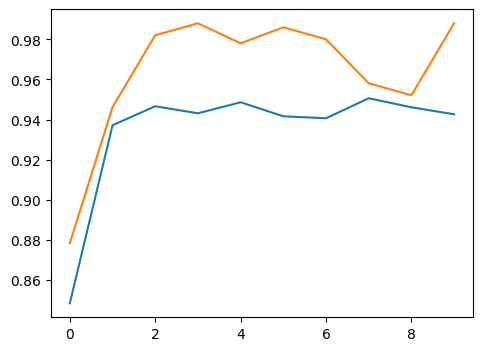

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])


plt.show()


In [66]:
model.save('rainny_sunny.h5')
model2.save('day_night.h5')

In [67]:
pd.set_option('display.max_colwidth', None)


In [68]:
val_df

,filename,weather,period
0,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (679).jpg,Rainny,Day
1,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (680).jpg,Rainny,Day
2,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (696).jpg,Rainny,Day
3,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (656).jpg,Rainny,Day
4,/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (688).jpg,Rainny,Day
...,...,...,...
195,/kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (694).jpg,Sunny,Night
196,/kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (653).jpg,Sunny,Night
197,/kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (655).jpg,Sunny,Night
198,/kaggle/input/yolo-dataset/images/Val/Sunny/Night/night (664).jpg,Sunny,Night


In [69]:
len(val_df)

200

In [70]:
true_time_labels = np.array(val_df[['period']])

In [71]:
true_time_label = []
for i in true_time_labels:
    if i == ['Day']:
        true_time_label.append(0)
    else:
        true_time_label.append(1)

In [72]:
len(true_time_label)

200

In [73]:
true_weather_labels = np.array(val_df[['weather']])
len(true_weather_labels)

200

In [74]:
true_weather_label = []
for i in true_weather_labels:
    if i == ['Rainny']:
        true_weather_label.append(0)
    else:
        true_weather_label.append(1)

In [75]:
len(true_weather_label)

200

In [76]:
filenames = np.array(val_df[['filename']])
filenames.flatten()
#filenames

array(['/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (679).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (680).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (696).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (656).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (688).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (699).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (668).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (671).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (658).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (662).jpg', '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (693).jpg',
       '/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (654).jpg', '/kaggle/input/yolo-dataset/images/V

In [77]:
pred_time_labels = []
for i in filenames:
    pred_time_labels.append(np.argmax(make_predictions2(i[0])))
pred_time_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [78]:
pred_weather_labels = []
for i in filenames:
    pred_weather_labels.append(np.argmax(make_predictions(i[0])))
pred_weather_labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1]

In [79]:
print(classification_report(true_weather_label, pred_weather_labels))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       100
           1       0.96      0.76      0.85       100

    accuracy                           0.86       200
   macro avg       0.88      0.86      0.86       200
weighted avg       0.88      0.86      0.86       200



In [80]:
len(pred_time_labels)

200

In [81]:
print(classification_report(true_time_label, pred_time_labels))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       100
           1       1.00      0.71      0.83       100

    accuracy                           0.85       200
   macro avg       0.89      0.85      0.85       200
weighted avg       0.89      0.85      0.85       200



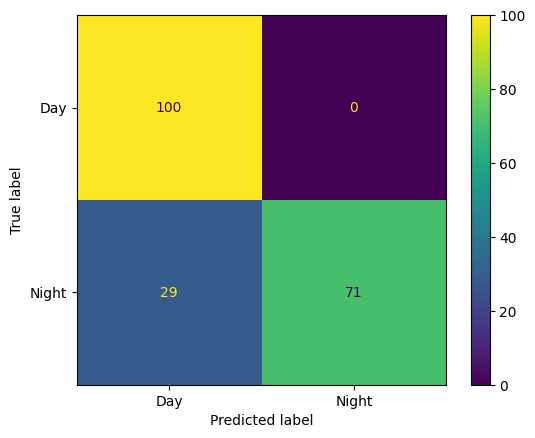

In [82]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_time_label, pred_time_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Day', 'Night'])
disp.plot()
plt.show()

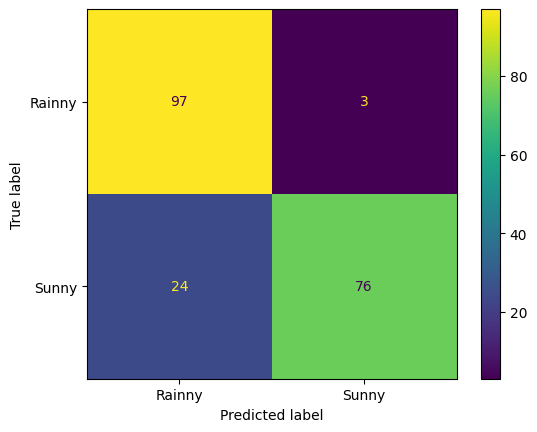

In [83]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_weather_label, pred_weather_labels, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Rainny', 'Sunny'])
disp.plot()
plt.show()

In [2]:
!pip install ultralytics

In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
from ultralytics import YOLO


In [ ]:
model_sunny_day = YOLO('yolov8x.pt')
result=model_sunny_day.train(data='/kaggle/input/yolo-dataset/sunny-day.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=False
)

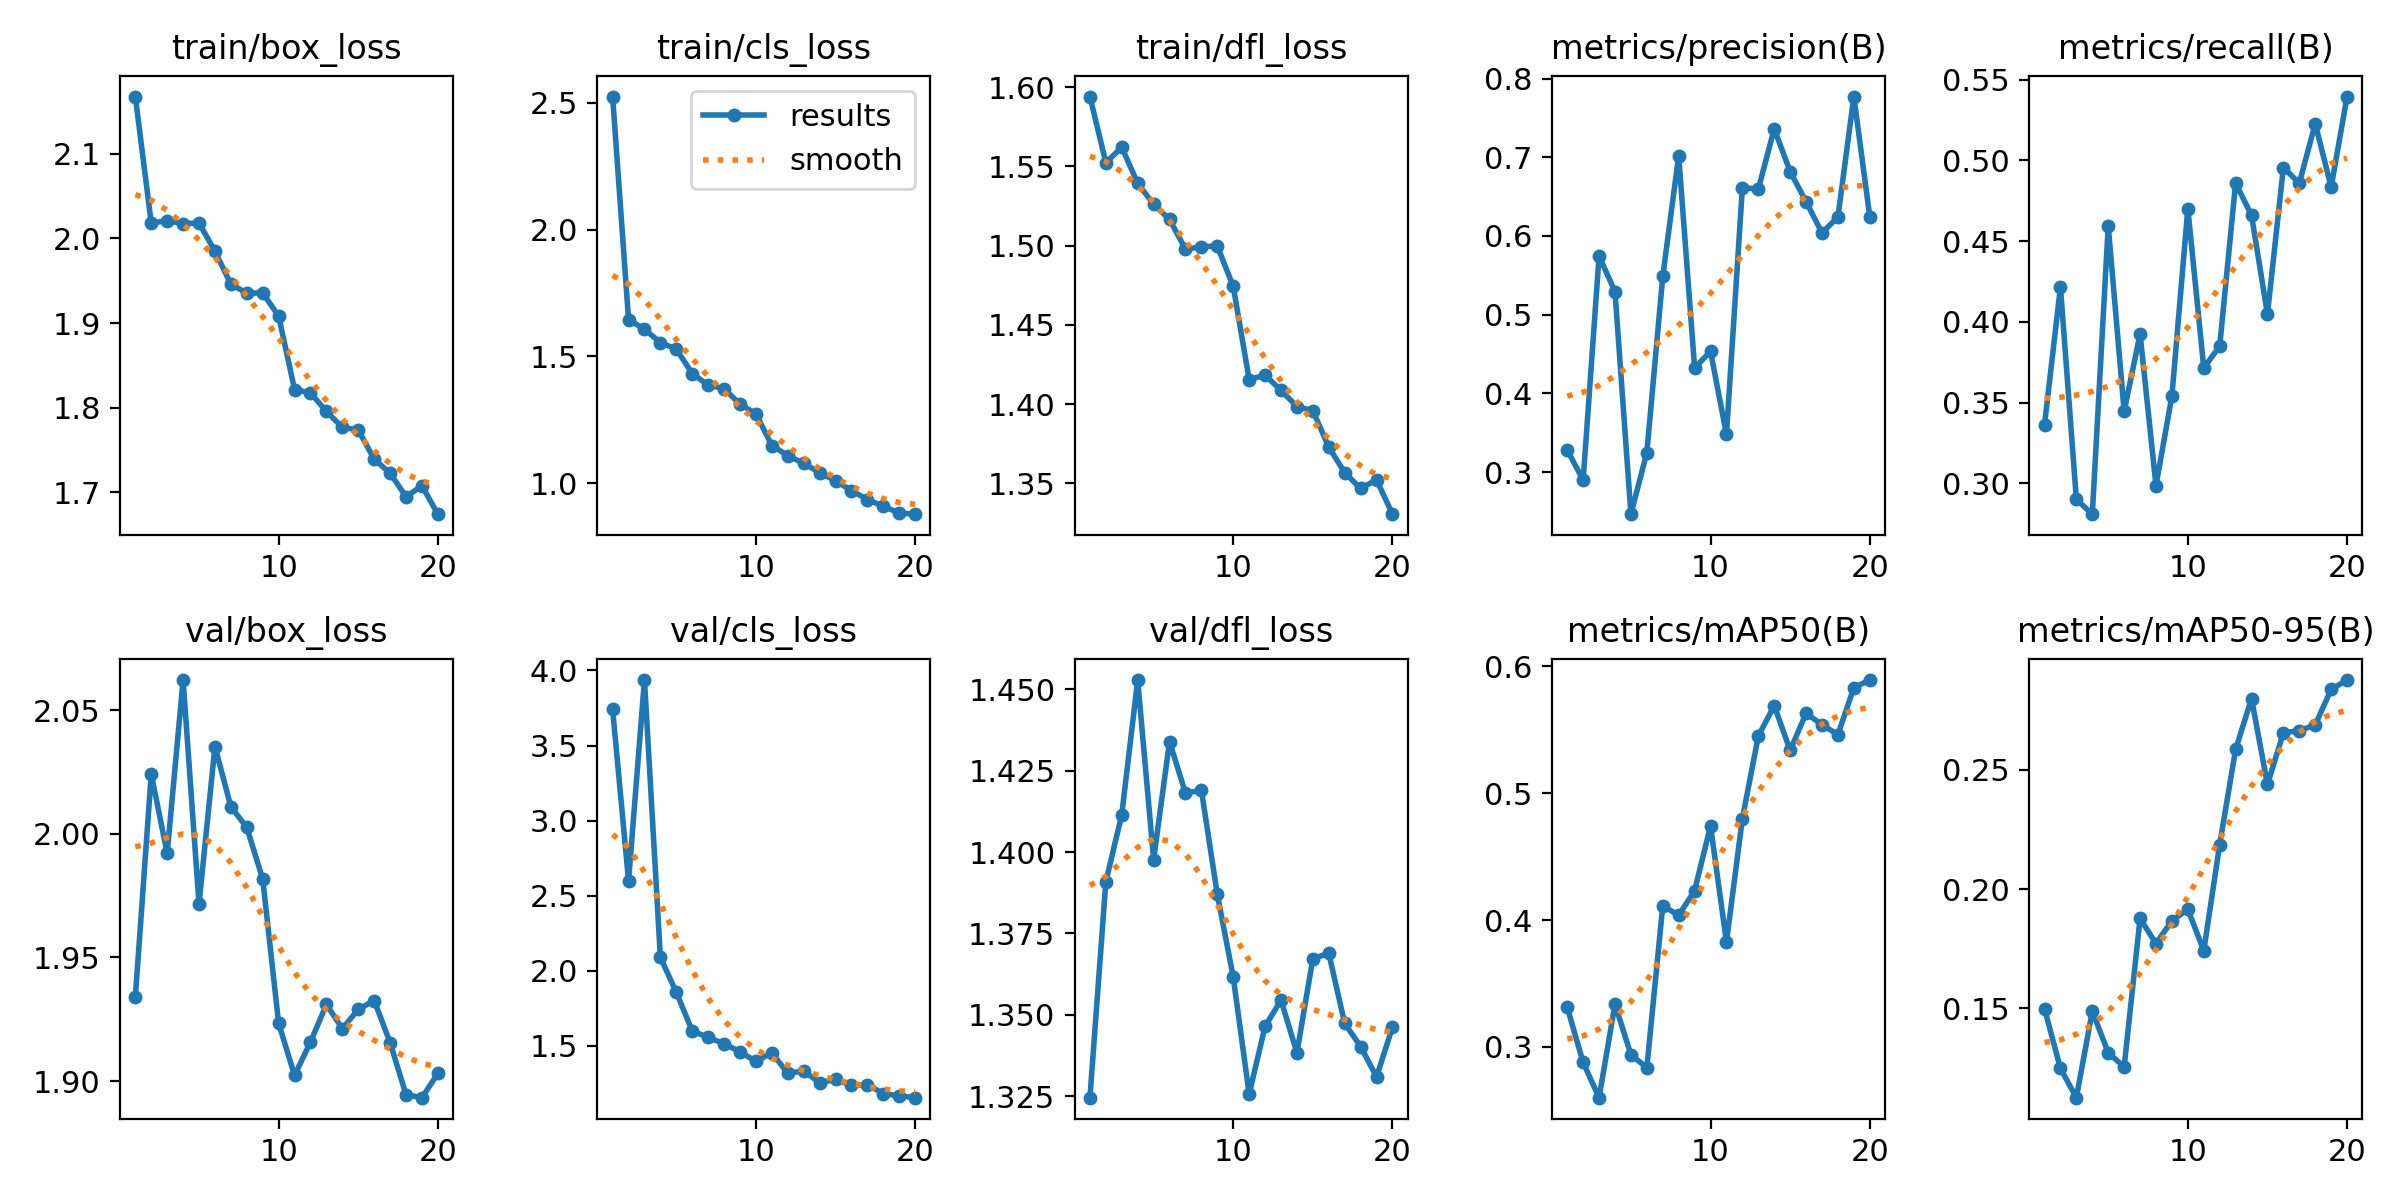

In [5]:
from PIL import Image
Image.open("/kaggle/working/yolo/results.png")

In [6]:
import pandas as pd
pd.read_csv("/kaggle/working/yolo/results.csv")

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,2.1674,2.52440,1.5940,0.32813,0.33632,0.33122,0.14982,1.9339,3.7404,1.3246,0.000191,0.000191,0.000191
1,2,2.0179,1.64490,1.5523,0.28989,0.42161,0.28775,0.12482,2.0242,2.5985,1.3909,0.000368,0.000368,0.000368
2,3,2.0209,1.60700,1.5620,0.57440,0.28996,0.25997,0.11256,1.9921,3.9364,1.4115,0.000525,0.000525,0.000525
3,4,2.0174,1.55410,1.5393,0.52932,0.28081,0.33366,0.14878,2.0622,2.0887,1.4528,0.000501,0.000501,0.000501
4,5,2.0181,1.52850,1.5260,0.24665,0.45951,0.29383,0.13140,1.9716,1.8572,1.3977,0.000472,0.000472,0.000472
5,6,1.9847,1.43200,1.5165,0.32489,0.34464,0.28369,0.12546,2.0353,1.5989,1.4339,0.000442,0.000442,0.000442
6,7,1.9459,1.38660,1.4977,0.54867,0.39243,0.41130,0.18765,2.0110,1.5564,1.4181,0.000413,0.000413,0.000413
7,8,1.9353,1.37270,1.4993,0.70193,0.29849,0.40377,0.17714,2.0026,1.5137,1.4190,0.000384,0.000384,0.000384
8,9,1.9355,1.31120,1.4997,0.43250,0.35416,0.42329,0.18665,1.9817,1.4605,1.3870,0.000355,0.000355,0.000355
9,10,1.9082,1.27350,1.4742,0.45333,0.47020,0.47422,0.19151,1.9234,1.3962,1.3616,0.000326,0.000326,0.000326


In [7]:
model_sunny_day = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

In [8]:
import cv2
import matplotlib.pyplot as plt

# Define a function to draw boxes
def draw_boxes(image, results):
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > 0.6:
            
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(image, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)


In [9]:
# Load the image
def make_boxes(model, image_path):
    results = model(image_path)[0]
    image = cv2.imread(image_path)
    draw_boxes(image, results)

    # Convert the image from BGR to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (124).jpg: 384x640 15 cars, 77.4ms
Speed: 3.3ms preprocess, 77.4ms inference, 135.6ms postprocess per image at shape (1, 3, 384, 640)


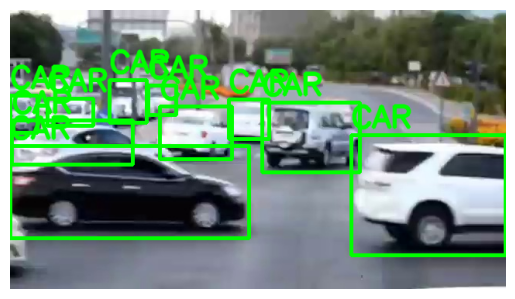

In [10]:
make_boxes(model_sunny_day, "/kaggle/input/yolo-dataset/images/Train/Sunny/Day/Sunny-Day (124).jpg")

In [ ]:
from ultralytics import YOLO

model_sunny_night = YOLO('yolov8x.pt')
result=model_sunny_night.train(data='/kaggle/input/yolo-dataset/sunny-night.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

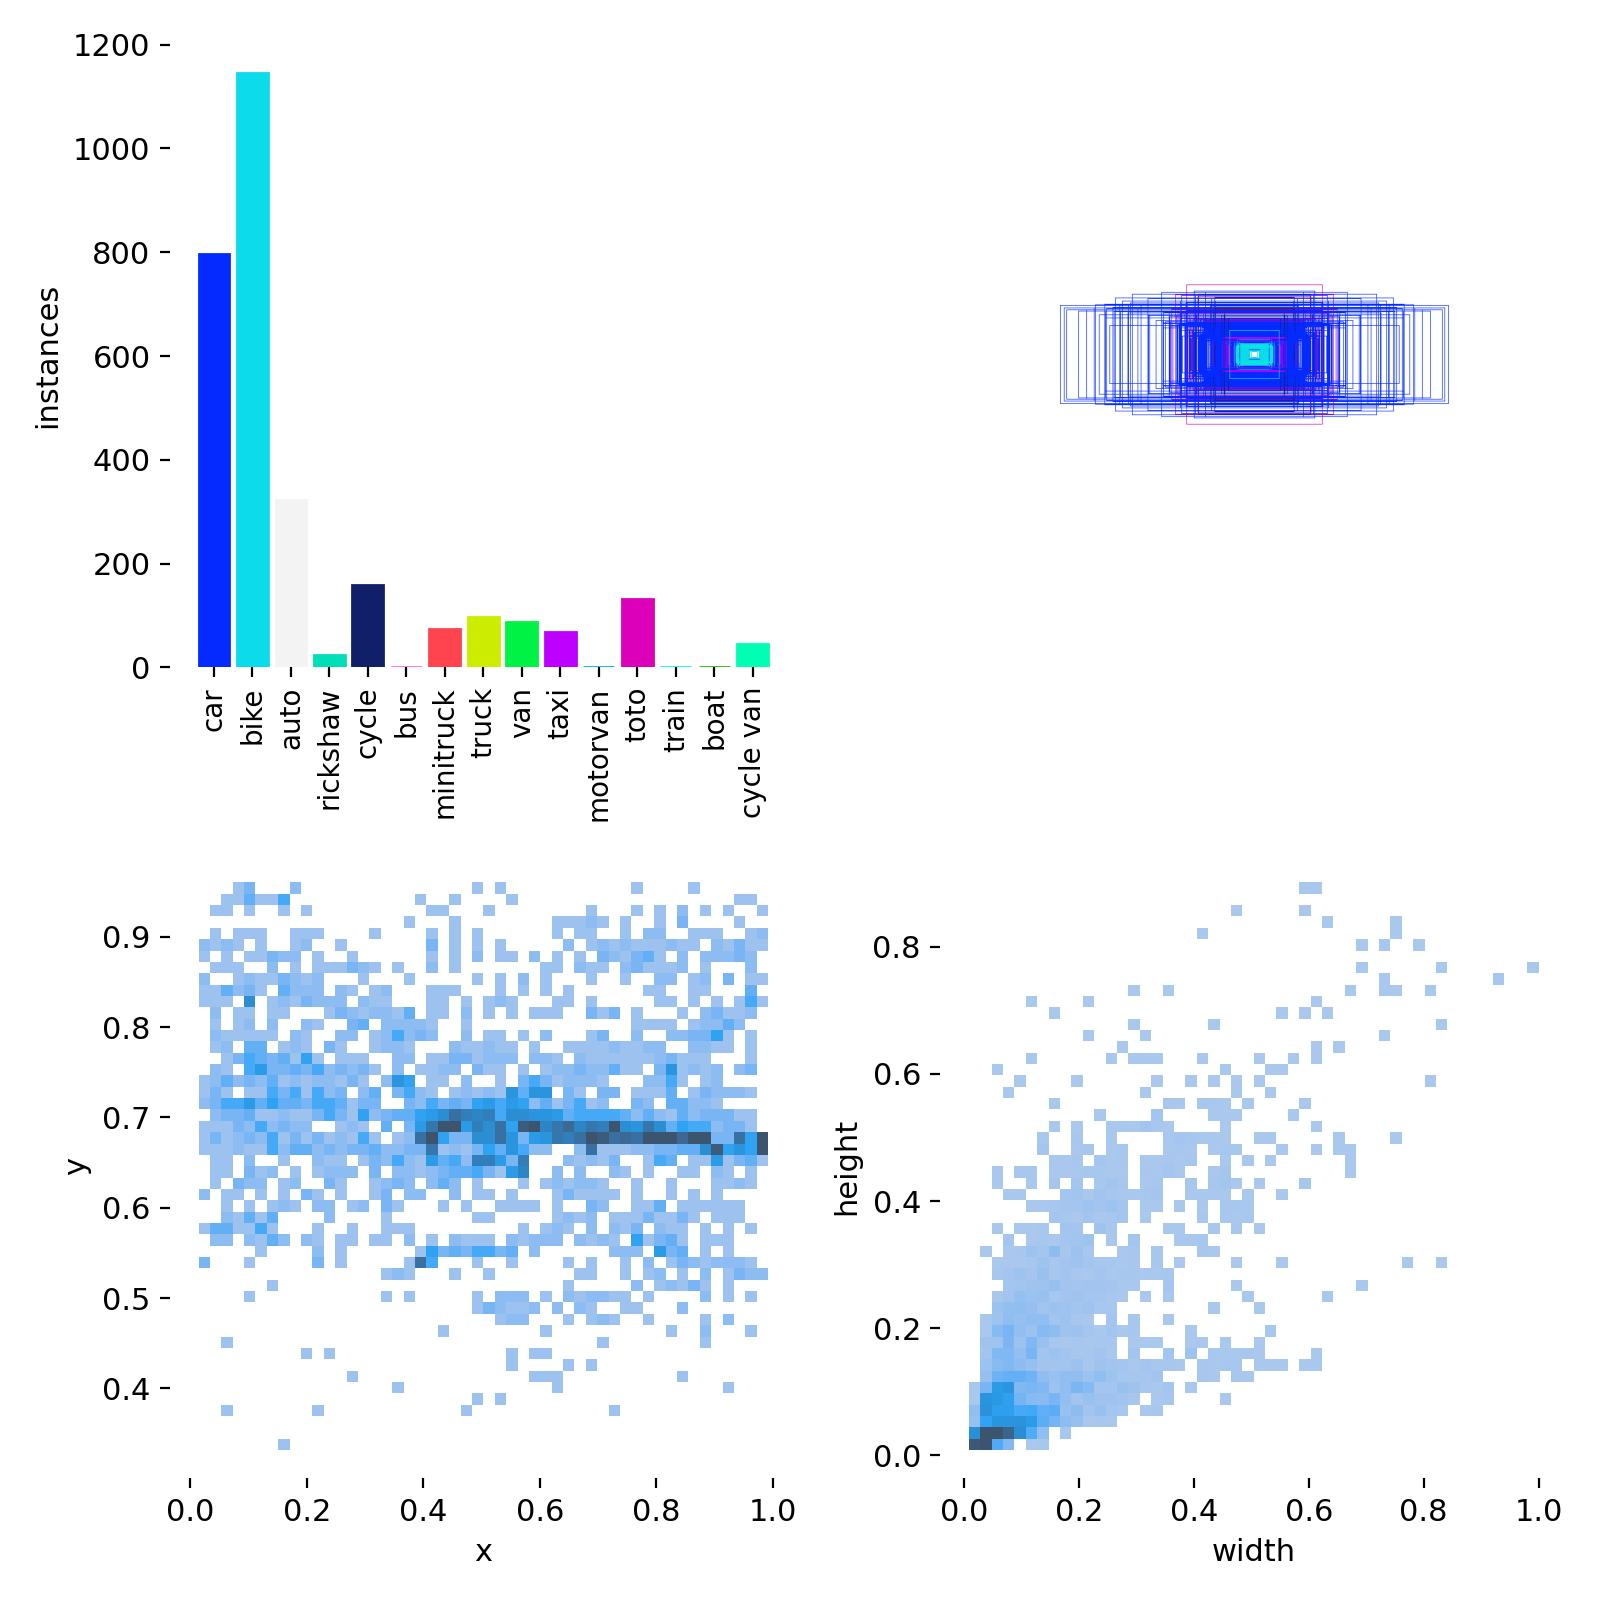

In [11]:
Image.open("/kaggle/working/yolo1(sunny-night)/labels.jpg")

In [12]:
model_sunny_night = YOLO("/kaggle/working/yolo1(sunny-night)/weights/best.pt")


image 1/1 /kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (200).jpg: 640x384 3 cars, 67.8ms
Speed: 2.1ms preprocess, 67.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)


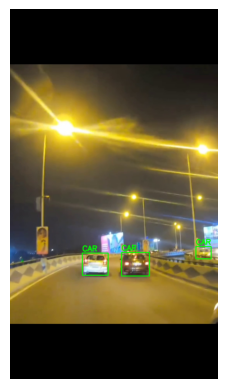

In [13]:
make_boxes(model_sunny_night, "/kaggle/input/yolo-dataset/images/Train/Sunny/Night/night (200).jpg")

In [ ]:
from ultralytics import YOLO

model_rainny_day = YOLO('yolov8x.pt')
result=model_rainny_day.train(data='/kaggle/input/yolo-dataset/rainny-day.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

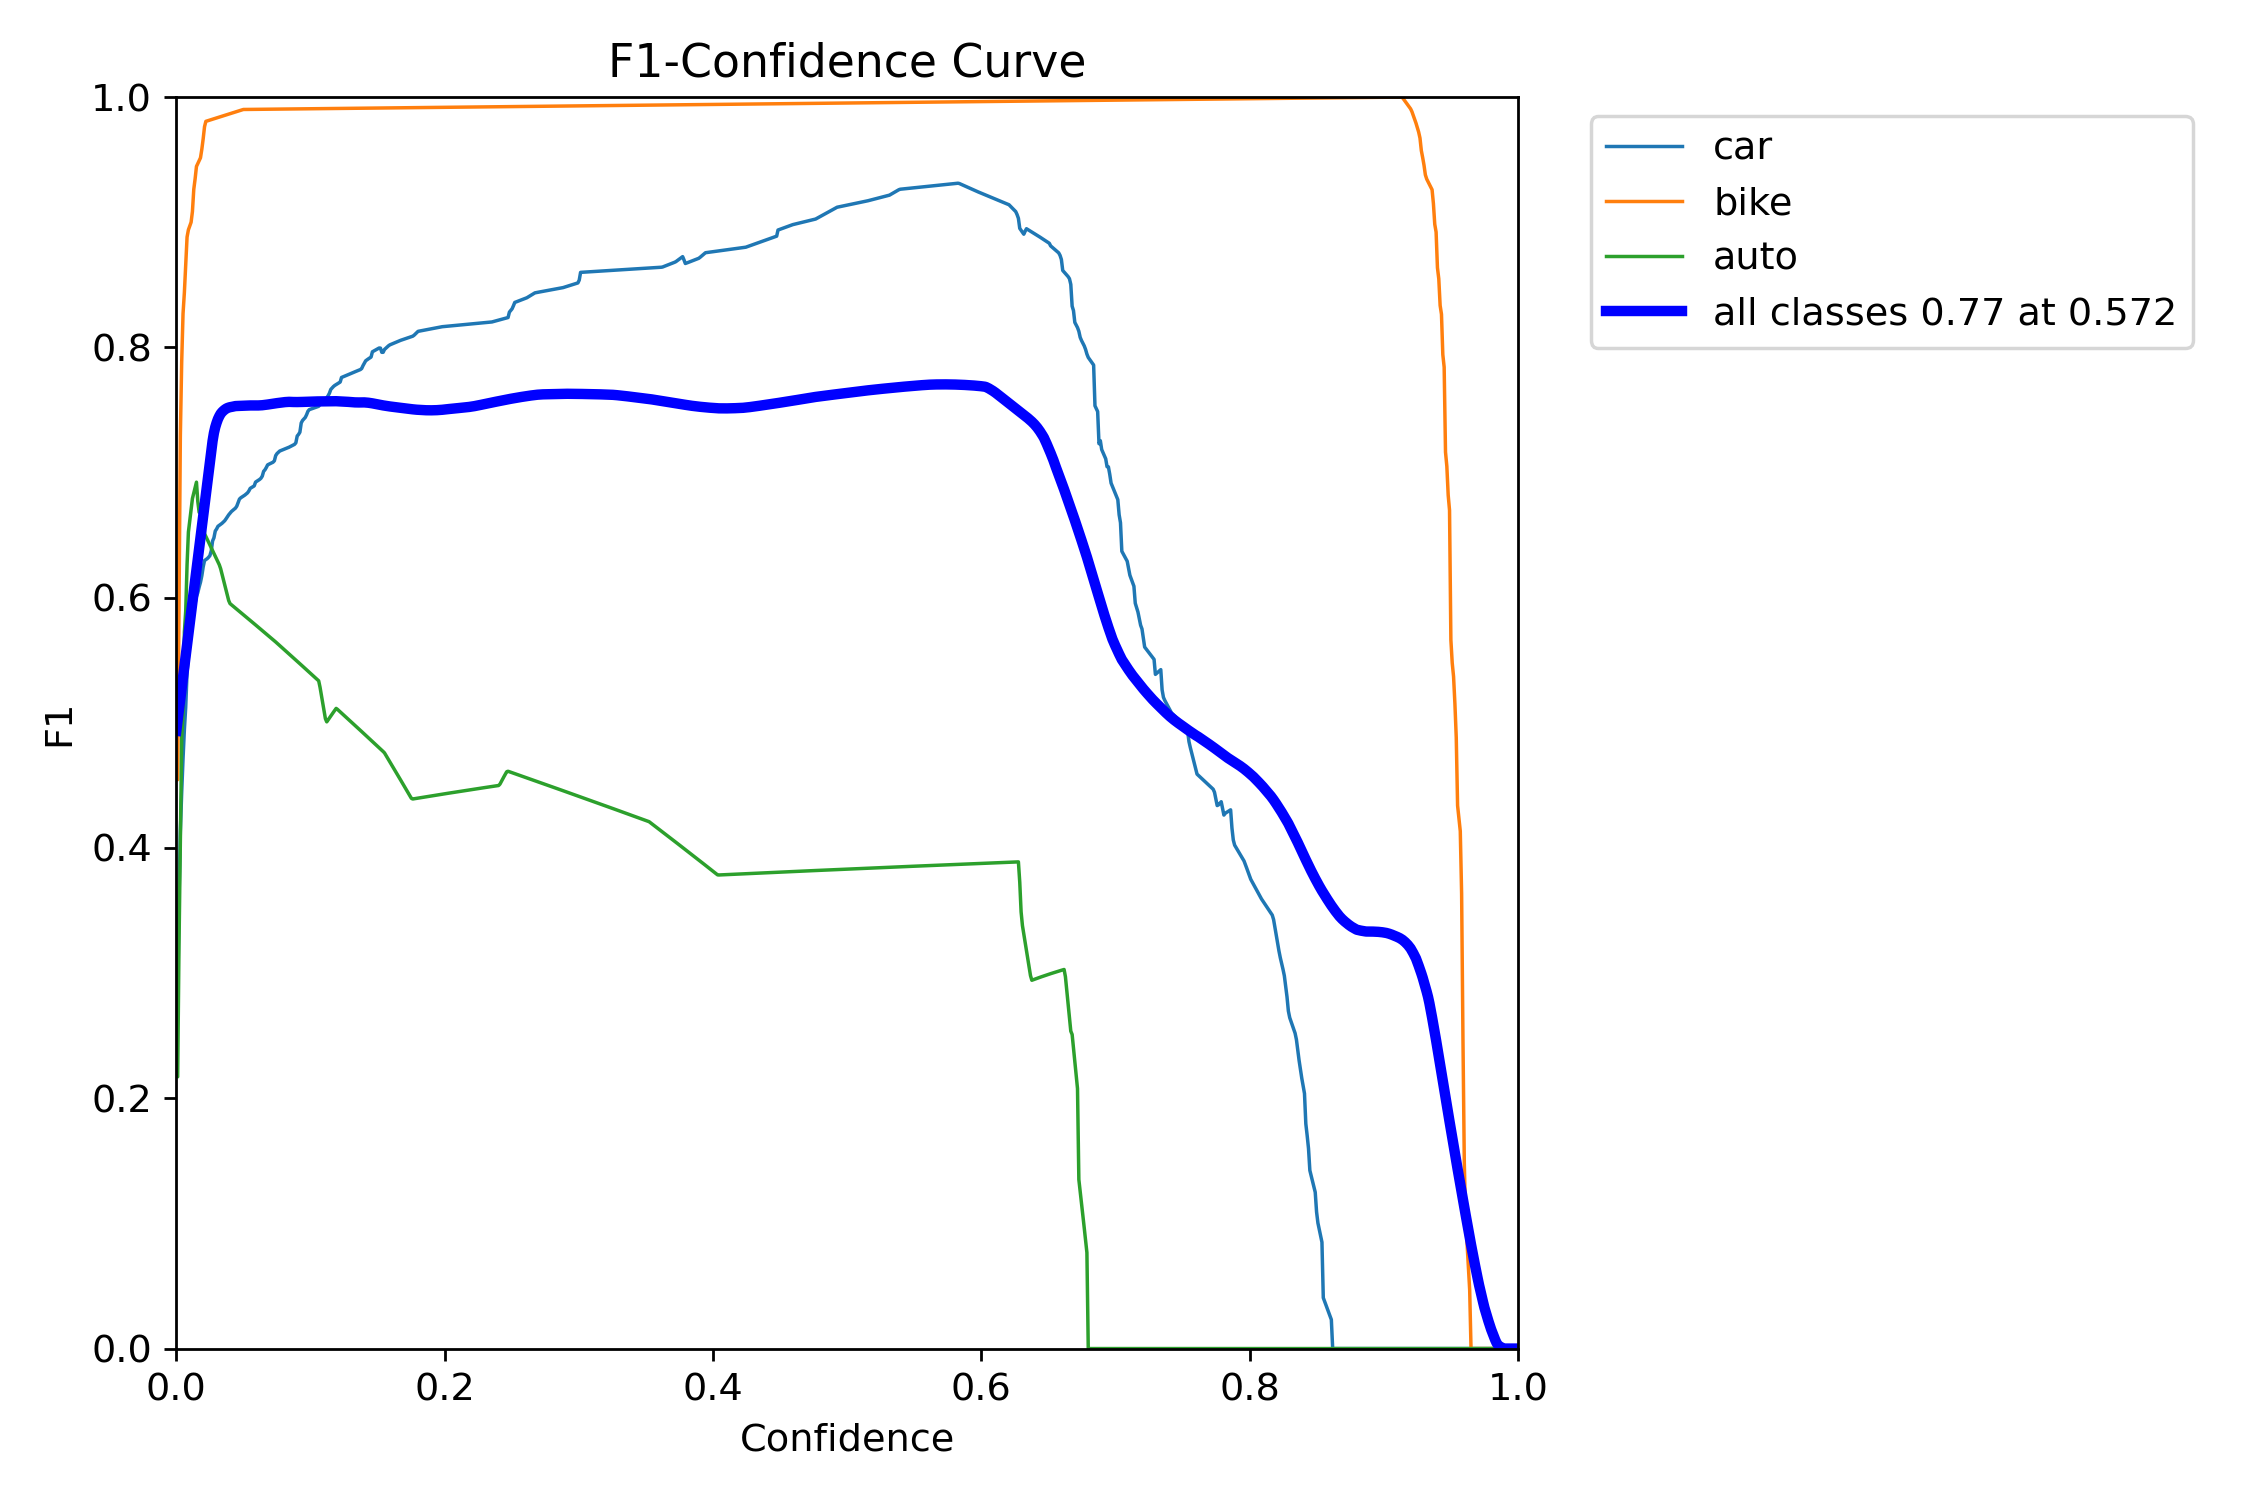

In [14]:
Image.open("/kaggle/working/yolo2(rainny-day)/F1_curve.png")

In [15]:
model_rainny_day = YOLO("/kaggle/working/yolo2(rainny-day)/weights/best.pt")


image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg: 640x640 2 cars, 1 bike, 1 auto, 37.1ms
Speed: 2.5ms preprocess, 37.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


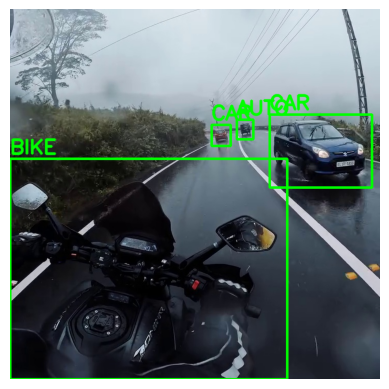

In [16]:
make_boxes(model_rainny_day,"/kaggle/input/yolo-dataset/images/Val/Rainny/Day/rainy day (657).jpg")

In [ ]:
from ultralytics import YOLO

model_rainny_night = YOLO('yolov8x.pt')
result=model_rainny_night.train(data='/kaggle/input/yolo-dataset/rainny-night.yaml',
    epochs=20,  # Set epochs to 10
    imgsz=640,  # Image size
    batch=16,   # Batch size
    augment=True,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.5,
    copy_paste=0.3,
    hsv_h=0.015,  # HSV-Hue augmentation
    hsv_s=0.7,    # HSV-Saturation augmentation
    hsv_v=0.4,    # HSV-Value augmentation
    lr0=0.01,     # Initial learning rate
    lrf=0.01,     # Final learning rate fraction
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,      # Box loss gain
    cls=0.5,      # Cls loss gain
    dfl=1.5,      # DFL loss gain
    overlap_mask=True,
    mask_ratio=4,
    patience=50,
    save=True,
    cache=True
)

In [17]:
import shutil

source_path = "/kaggle/working/runs/detect/train8"

destination_path = "/kaggle/working/yolo3(rainny-night)"

# Copy the file to the destination
shutil.copytree(source_path, destination_path)

'/kaggle/working/yolo3(rainny-night)'

In [3]:
!pip install ultralytics

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 21.8 MB/s eta 0:00:0000:01


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import glob
from PIL import Image

In [5]:
from ultralytics import YOLO

In [6]:
import gc
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import cv2
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
from collections import defaultdict

class ImageClassifierDetector:
    def __init__(self, yolo_models, img_path, threshold):
        self.yolo_models = yolo_models
        self.img_path = img_path
        self.threshold = threshold
        self.dn=0
        self.rs=0
    
    def make_predictions(self, model):
        image = image_utils.load_img(self.img_path, target_size=(224, 224))
        image = image_utils.img_to_array(image)
        image = image.reshape(1,224,224,3)
        image = preprocess_input(image)
        preds = model.predict(image)
        return preds 
    def contains_text(self, image, x1, y1):
        # Define the area where the text would be drawn
        text_width, text_height = 100, 30  # Assumed size of the text area
        y_start = max(0, int(y1) - text_height)
        y_end = int(y1)
        x_start = int(x1)
        x_end = int(x1) + text_width
        
        # Extract the region of interest (ROI)
        roi = image[y_start:y_end, x_start:x_end]

        # Define the green color range
        lower_green = np.array([0, 255, 0])
        upper_green = np.array([0, 255, 0])

        # Create a mask for green color
        mask = cv2.inRange(roi, lower_green, upper_green)
        
        # Check if there are any green pixels in the ROI
        green_pixels = cv2.countNonZero(mask)

        # Heuristic: if there are green pixels, assume the region contains text
        if green_pixels > 0:
            return True
        return False
    
    def draw_boxes(self, image, mp):
        for class_name, values in mp.items():      
            print(class_name, values)
            for value in values:
                x1, y1, x2, y2, score = value
                if score >= self.threshold:
                    if not self.contains_text(image,x1,y1-10):
                        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
                        cv2.putText(image, class_name.upper(), (int(x1), int(y1 - 10)),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
    
    def make_boxes(self, models):
        image = cv2.imread(self.img_path)
        mp = defaultdict(list)
        for model in models:
            results = model(self.img_path)[0]
            z = []
            for result in results.boxes.data.tolist():
                x1, y1, x2, y2, score, class_id = result
                class_name = results.names[int(class_id)].lower()
                if(len(mp[class_name]) != 0):
                    v = mp[class_name]
                    if abs(v[-1][0] - x1) >= 6 and abs(v[-1][1] - y1) >= 6 and abs(v[-1][2] - x2) >= 6 and abs(v[-1][3]- y2)>=6:
                        mp[class_name].append([x1,y1,x2,y2,score])
                else:
                    mp[class_name].append([x1,y1,x2,y2,score])      
        self.draw_boxes(image, mp)
        # Convert the image from BGR to RGB for displaying
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()
    def run_tf(self):
        model_day_night = tf.keras.models.load_model("day_night.h5")
        model_rainny_sunny = tf.keras.models.load_model("rainny_sunny.h5")
        dn = np.argmax(self.make_predictions(model_day_night))
        rs = np.argmax(self.make_predictions(model_rainny_sunny))
        f = open("dn_rs.txt", "w")
        f.write(f"{dn},{rs}")
        f.close()
        print(dn , rs)
    def run(self):
        p = multiprocessing.Process(target=self.run_tf)
        p.start()
        p.join()
        f=open("dn_rs.txt", "r")
        self.dn, self.rs = map(int, f.read().split(","))
        print(self.dn + self.rs)
        f.close()
        self.make_boxes([self.yolo_models[self.dn+self.rs], self.yolo_models[self.rs + (self.dn==0)]])

In [7]:
model_sunny_day = YOLO("/kaggle/working/yolo/weights/best.pt")
model_sunny_night = YOLO("/kaggle/working/yolo1(sunny-night)/weights/best.pt")
model_rainny_day = YOLO("/kaggle/working/yolo2(rainny-day)/weights/best.pt")
model_rainny_night = YOLO("/kaggle/working/yolo3(rainny-night)/weights/best.pt")

In [8]:
models = [model_rainny_day, model_rainny_night, model_sunny_day, model_sunny_night]

In [9]:
test = ImageClassifierDetector(models, "/kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg", threshold=0)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


I0000 00:00:1722271198.406156     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
0 0


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0

image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg: 640x384 1 car, 1 bike, 123.6ms
Speed: 10.2ms preprocess, 123.6ms inference, 220.2ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /kaggle/input/yolo-dataset/images/Val/Rainny/Night/rainynight (658).jpg: 640x384 4 cars, 1 bus, 25.1ms
Speed: 2.3ms preprocess, 25.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
car [[697.73779296875, 823.790283203125, 1077.517578125, 1025.5010986328125, 0.4628556966781616], [367.1715087890625, 812.30078125, 446.382568359375, 884.9801025390625, 0.5426656603813171]]
bike [[0.0, 877.9068603515625, 1080.0, 1904.8179931640625, 0.29182761907577515]]
bus [[82.8340072631836, 736.6016235351562, 245.3040771484375, 847.3897705078125, 0.8153600096702576]]


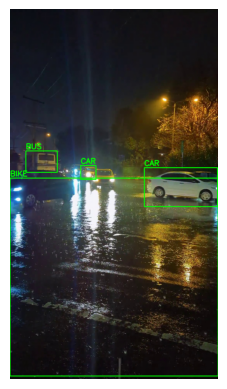

In [10]:
test.run()